<a href="https://colab.research.google.com/github/meta-llama/llama-cookbook/blob/main/getting-started/Llama_4_Reasoning_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

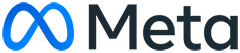

<p align="center">
	<a href="https://llama.developer.meta.com/?utm_source=llama-cookbook&utm_medium=readme&utm_campaign=main"><img src="https://img.shields.io/badge/Llama_API-Sign_up-4BA9FE?logo=meta" /></a>
	<a href="https://llama.developer.meta.com/docs?utm_source=llama-cookbook&utm_medium=readme&utm_campaign=main"><img src="https://img.shields.io/badge/Llama_API-Documentation-E4E6Eb?logo=meta" /></a>
</p>
<p align="center">
	<a href="https://github.com/meta-llama/llama-models/blob/main/models/?utm_source=llama-cookbook&utm_medium=readme&utm_campaign=main"><img alt="Llama Model cards" src="https://img.shields.io/badge/Llama-Model_cards-green?logo=meta" /></a>
	<a href="https://www.llama.com/docs/overview/?utm_source=llama-cookbook&utm_medium=readme&utm_campaign=main"><img alt="Llama Documentation" src="https://img.shields.io/badge/Llama-Documentation-e4e6eb?logo=meta" /></a>
	<a href="https://huggingface.co/meta-llama"><img alt="Hugging Face meta-llama" src="https://img.shields.io/badge/Hugging_Face-meta--llama-yellow?logo=huggingface" /></a>
</p>

# Running this notebook
## API Keys
1. Setup Llama API account and get an API key from the dashboard (https://llama.developer.meta.com/1296648131567215/)

# Notebook Outline
In this notebook, we will explore the capabilities of Llama 4 Reasoning models: 

1. Overview of MoE architecture
2. Llama API Model Usage
3. Difference between Regular and Reasoning Models:
    - Context Length
    - Number of Experts
4. Reasoning Tags & Parcing Reasoning Model output
5. Prompting Reasoning Model with good samples for both text and image
6. Using top-p, temperature, max_output_tokens
7. Best practices
8. Safety
9. Hyperlink to using Llama API with reasoning Model if available

# Introduction
Llama 4 models are natively multimodal, delivering best-in-class image and text capabilities. It's based in a Mixture-of-Experts (MoE) architecture and comprises two collections of models: Llama 4 Omni and Llama 4 Reasoning. The Omni model targets applications in multi image understanding, OCR, mulilingual agents, planning and tool use. The Reasoning model is best for challenging math, science and reasoning problems as well as coding assistant and STEM assistant.

Both Llama 4 Omni and Llama 4 Reasoning support the same feature set, including:
- Multilingual text input in [number-of-language] 
- Image understanding
- TBD Tool calling
- TBD Function calling
- TBD Structured output in JSON format

# Llama4 MoE Architecture Overview
Llama 4 uses a standard MoE and dense split across FFN and attention layers. Attention layers are the same as dense models - only the FFN layers have sparse parameters.
<img src="../src/docs/img/Llama4_MoE_Architecture.png" alt="" style="display: block; margin: 0 auto;" />
Where the MoE layer has some routed experts and one shared expert. All tokens go through the shared expert.
<img src="../src/docs/img/Llama4_MoE_Layer.png" alt="" style="display: block; margin: 0 auto;" />

## Models

Llama 4 is a collection of 2 large language models (LLMs):

#### Pretrained & Instruct Models:
1. `llama 4 Omni` (text+multi image+speech(no OSS) input; text+speech(no OSS) output) - MoE with 16 expets
1. `llama 17b Reasoning` (text+single image input; text output) - MoE with 16 routed expets and shared experts and capacity factor 1, 17B active parameters, 108B total parameters


[Model Card](https://github.com/meta-llama/llama-models/blob/main/models/llama3_2/MODEL_CARD.md#instruction-tuned-models)    [TO DO: UPdate later]


# Llama 4 Reasoning

* *Open-source* 
* *Multimodal:* input: Text, Image(Single); Output: Text
* *Language Support:* English Only


## Getting Llama 4 Reasoning [TO DO: Update Later]

Large language models are deployed and accessed in a variety of ways, including:

1. **Self-hosting**: Using local hardware to run inference. Ex. running Llama on your Macbook Pro using [llama.cpp](https://github.com/ggerganov/llama.cpp) or running inference with lightweight models in both [Android](https://github.com/pytorch/executorch/blob/main/examples/demo-apps/android/LlamaDemo/docs/delegates/xnnpack_README.md) and [iOS](https://github.com/pytorch/executorch/blob/main/examples/demo-apps/apple_ios/LLaMA/docs/delegates/xnnpack_README.md) using the [PyTorch ExecuTotch](https://github.com/pytorch/executorch) framework.
1. **Cloud hosting**: Using a cloud provider to deploy a model. Ex. AWS, Azure, GCP, and others.
1. **Hosted API**: Llama API as a service. Ex. AWS Bedrock, Replicate, Anyscale, Groq, Together and others.

### Hosted APIs

Hosted APIs are the easiest way to get started. We'll use them here. As an example, we'll call Llama 4  using [Llama API](https://llama.developer.meta.com/).


## Notebook Setup

To install prerequisites run:

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install git+ssh://git@github.com/facebookincubator/llama-api-python.git

In [ ]:
!pip install matplotlib
!pip list pillow

# Prompting Llama 4 Reasoning Models

Prompt engineering is using natural language to produce a desired response from a large language model (LLM).

In this section, we'll focus on Llama 4 17B reasoning model. You'll first learn special tokens that are supported by Llama 4 for prompt formating, then learn how to perform over 10 interesting or practical LLM tasks, including:
[TO DO: Update]
1. Llama 4 Prompt Formatting Special Tokens
1. Multimodal use-cases
    * Image captioning/labeling
    * Cooking/Shopping assistant
    * Travel assistant
1. Tool calling

## Llama 4 Prompt Formatting Special Tokens
Here is a list of special tokens that are supported by Llama 4:
<!--
* `<|begin_of_text|>`: Specifies the start of the prompt
* `<|end_of_text|>`: Model will cease to generate more tokens. This token is generated only by the base models.
* `<|header_start|>` and `<|header_end|>`: These tokens enclose the role for a particular message. The possible roles are: [system, user and assistant].
* `<|eom|>`: End of message. A message represents a possible stopping point for execution where the model can inform the executor that a tool call needs to be made.
* `<|eot|>`: End of turn. Represents when the model has determined that it has finished interacting with the user message that initiated its response.
* `<|image_start|>` and `<|image_end|>`: These tokens enclose the image data in the prompt.
* `<|patch|>`: This token represents a piece of the tile/
* `<|tile_y_separator|>` and `<|tile_x_separator|>`: These tokens are used to separate the y and x tiles of an image
* `<|image|>`: In the new architecture, this token now separates the regular sized image information from a downsized version of it that fits in a single tile.-->
<table>
  <tr>
    <th>Token</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>&lt;|begin_of_text|&gt;</td>
    <td>Specifies the start of the prompt</td>
  </tr>
  <tr>
    <td>&lt;|end_of_text|&gt;</td>
    <td>Model will cease to generate more tokens. This token is generated only by the base models.</td>
  </tr>
  <tr>
    <td>&lt;|header_start|&gt; and &lt;|header_end|&gt;</td>
    <td>These tokens enclose the role for a particular message. The possible roles are: [system, user and assistant].</td>
  </tr>
  <tr>
    <td>&lt;|eom|&gt;</td>
    <td>End of message. A message represents a possible stopping point for execution where the model can inform the executor that a tool call needs to be made.</td>
  </tr>
  <tr>
    <td>&lt;|eot|&gt;</td>
    <td>End of turn. Represents when the model has determined that it has finished interacting with the user message that initiated its response.</td>
  </tr>
  <tr>
    <td>&lt;|image_start|&gt; and &lt;|image_end|&gt;</td>
    <td>These tokens enclose the image data in the prompt.</td>
  </tr>
  <tr>
    <td>&lt;|patch|&gt;</td>
    <td>This token represents a piece of the tile/</td>
  </tr>
  <tr>
    <td>&lt;|tile_y_separator|&gt; and &lt;|tile_x_separator|&gt;</td>
    <td>These tokens are used to separate the y and x tiles of an image</td>
  </tr>
  <tr>
    <td>&lt;|image|&gt;</td>
    <td>In the new architecture, this token now separates the regular sized image information from a downsized version of it that fits in a single tile.</td>
  </tr>
</table>

[TO DO: Update the link later]
[Prompt Format Documentation](https://www.llama.com/docs/model-cards-and-prompt-formats/llama3_2#-llama-3.2-vision-models-(11b/90b)-)

## Initialize the Llama API (Replace with your API Key)

In [ ]:
import os
from llama_api import LlamaAPI
from llama_api._types import Omit


client = LlamaAPI(
    api_key="LLM|985490929915228|efFvO9IC864irmXBKxNR3JEV0kw"
)



response = client.chat.completions.create(
    model="Llama-4-Maverick-17B-128E-Instruct-FP8",
    messages=[
      {
        "role": "user",
        "content": "Hi how are you?"
      },
      {
        "role": "assistant",
        "content": "I'\''m just a language model, I don'\''t have feelings or emotions like humans do, but I'\''m functioning properly and ready to help with any questions or tasks you have! How can I assist you today?",
        "stop_reason": "stop"
      },
      {
        "role": "user",
        "content": "Can you imagine having feelings?"
      },
    ],
    max_completion_tokens=1024,
    temperature=0.7,
)

print(response.completion_message.content.text)

## Find available models

In [ ]:
response = client.models.list()
for model in response:
    print(model)
#print(response)

In [ ]:
import requests
import logging
from bs4 import BeautifulSoup

# Set up logging to output debug-level information to the console.
logging.basicConfig(level=logging.DEBUG, format='%(levelname)s: %(message)s')

def fetch_content_with_logging(url):
    """
    Fetches the HTML content from the provided URL with additional logging for debugging.
    
    Args:
        url (str): The URL of the page to fetch.
        
    Returns:
        str: The HTML content of the page if successful.
        
    Raises:
        requests.RequestException: If the HTTP request fails.
    """
    headers = {
        "User-Agent": ("Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                       "AppleWebKit/537.36 (KHTML, like Gecko) "
                       "Chrome/91.0.4472.124 Safari/537.36"),
        # You could add more headers if needed, e.g., Accept, Accept-Language, etc.
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8"
    }
    
    try:
        logging.debug("Attempting to fetch URL: %s", url)
        logging.debug("Using headers: %s", headers)
        
        response = requests.get(url)
        
        logging.debug("Received response with status code: %d", response.status_code)
        logging.debug("Sample content %s", response.text[:1000])
        # logging.debug("Response headers: %s", response.headers)
        
        # This will raise an HTTPError for 400, 500, etc.
        response.raise_for_status()
        
        html = response.text
        logging.debug("Successfully fetched content; content length: %d characters", len(html))
        return html
        
    except requests.RequestException as e:
        logging.error("Request failed with error: %s", e)
        
        # If we have a response object, log part of its text for debugging.
        if 'response' in locals() and response is not None:
            content_preview = response.text[:500]  # print first 500 characters
            logging.error("Response content preview: %s", content_preview)
        raise

def parse_article(html):
    """
    Parses the HTML content to extract the main text and images.
    
    The function uses BeautifulSoup to locate an <article> tag 
    (which is common for blog posts) and then extracts all paragraph
    texts and image sources within that tag.
    
    Args:
        html (str): The HTML content of the page.
        
    Returns:
        tuple: A tuple (text, images) where text is a string of concatenated
               paragraph texts and images is a list of image URLs.
    """
    soup = BeautifulSoup(html, 'html.parser')
    
    # Attempt to locate the article element
    article = soup.find('article')
    
    # Fallback: If no <article> is found, try looking for a common container class.
    if article is None:
        article = soup.find('body')
    
    if article is None:
        print("Could not find the main article content.")
        return "", []
    
    # Extract all paragraphs within the article.
    paragraphs = article.find_all('p')
    text = "\n".join(p.get_text(strip=True) for p in paragraphs if p.get_text(strip=True))
    
    # Extract all image URLs in the article.
    images = []
    for img in article.find_all('img'):
        # Get the src attribute; sometimes images may have a 'data-src' attribute instead.
        src = img.get("src") or img.get("data-src")
        if src:
            images.append(src)
    
    return text, images

def print_article_content(text, images):
    """
    Prints the extracted text and image URLs.
    
    Args:
        text (str): The text content of the article.
        images (list): A list of image URLs.
    """
    print("=== Article Text ===")
    print(text)
    print("\n=== Article Images ===")
    for idx, img_url in enumerate(images):
        print(f"[{idx}] {img_url}")


In [ ]:
url = "https://ai.meta.com/blog/llama-4-multimodal-intelligence/"
try:
    html_content = fetch_content_with_logging(url)
    text_content, image_urls = parse_article(html_content)
    print_article_content(text_content, image_urls)
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
## TODO 1: images directly from the CDN error out, need to download and convert to base64
## TODO 2: create images content dynamically based on the image list generated by the parser.

response = client.chat.completions.create(
    model="Llama-4-Maverick-17B-128E-Instruct-FP8",
    messages=[
      {
        "role": "user",
        "content": [
          {
            "type": "image_url",
            "image_url": {
              "url": "https://images.unsplash.com/photo-1582538885592-e70a5d7ab3d3?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1770&q=80"
            }
          },
          {
            "type": "text",
            "text": f"Summarize this article and tell me something about the image: {text_content}"
          }
        ]
      },
    ],
    max_completion_tokens=4096,
    temperature=0.7,
)



In [ ]:
print(response.completion_message.content.text)

In [ ]:
url = "https://www.llama.com/docs/model-cards-and-prompt-formats/llama4_omni/"
try:
    html_content = fetch_content_with_logging(url)
    text_content, image_urls = parse_article(html_content)
    print_article_content(text_content, image_urls)
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
print(html_content)

# STEM Assistant

## Text input only question

First, let's see how to use the Llama 4 reasoning model for text only input.

### Simple chat completion

In [ ]:
response = client.chat.completions.create(
messages=[
  {"role": "user", "content": "Which number is bigger: 9.11 or 9.9?"},
],
    model="dev-llama-4-17B-reasoning-latest",
    temperature=0.6,
    top_p=0.9,
    extra_body={
      'repetition_penalty':
      1,
    }
  )
print(response.completion_message.content.answer)

In [ ]:
# Expected output: 1) 2 horses and 2 chickens
#2) 3 goats and 1 chicken

response = client.chat.completions.create(
# Modify messages below to define conversation history
messages=[
  {"role": "user", "content": "A horse costs $50, a chicken costs $20, and a goat costs $40, you bought 4 animals for a total of $140. Which animals (and how many of each) did you buy?",},
],
    model="dev-llama-4-17B-reasoning-latest",
    temperature=0.6,
    top_p=0.9,
    extra_body={
      'repetition_penalty':
      1,
    }
  )

print(response.completion_message.content.answer)

To ask a follow up question, just add the first Llama response as "assistant" role's content, then the follow up question with the "user" role:

In [ ]:
response = client.chat.completions.create(
    # Modify messages below to define conversation history
    messages=[
      {"role": "user", "content": "A horse costs $50, a chicken costs $20, and a goat costs $40, you bought 4 animals for a total of $140. Which animals (and how many of each) did you buy?"},
      response.completion_message,
      {"role": "user", "content": "what if a horse costs $60?"},
    ],
    model="dev-llama-4-17B-reasoning-latest",
    temperature=0.6,
    top_p=0.9,
    extra_body={
      'repetition_penalty':
      1,
    }
  )

print(response.completion_message.content.answer)

In [ ]:
response = client.chat.completions.create(
messages=[
    #{"role": "system", "content":"You are a math professor, smart but cool."},
  {"role": "user", "content": """ Background: A train traveling from Bucharest to Ploiesti (60 km distance) has the speed of 60 km/h. 
The train starts in Bucharest and travels until Ploiesti, once, only in this direction.
A swallow, flying with 90 km/h, fly from Ploiesti to the moving train.
When it reaches the train, the swallow flies back toward Ploiesti,
ahead of the train. At Ploiesti turns again back and continues to fly back and forth 
(between the train approaching Ploiesti and Ploiesti) until the train reaches Ploiesti. 
The swallow will fly continously all the time the train is traveling from Bucharest to Ploiesti.
Reasoning: Think step by step. Explain your reasoning.
Question:
How many kilometers will travel totally the swallow? """},
],
    model="dev-llama-4-17B-reasoning-latest",
    temperature=0.6,
    top_p=0.9,
    extra_body={
      'repetition_penalty':
      1,
    }
  )

print(response.completion_message.content.answer)

In [ ]:
# "Use all the digits [0-9] to make three numbers: x,y,z so that x+y=z"

# For example, a possible solution is: x = 26, y = 4987, and z = 5013. Another possible soultion: 752 + 346 = 1098. It uses all digits 0-9 and x + y = z.

# Tweak this maybe it will work, currently it cannot find the answer!

In [ ]:
response = client.chat.completions.create(
  messages=[
      {"role": "user", "content": "Use all the digits [0-9] to make three numbers: x,y,z so that x+y=z"},
    ],
  model="dev-llama-4-17B-reasoning-latest",
  temperature=0.6,
  top_p=0.9,
  extra_body={
    'repetition_penalty':
    1,
  }
)

print(response.completion_message.content.answer)

In [ ]:
# Riddle: Name three things that are always coming, but never arrive.
response = client.chat.completions.create(
# Modify messages below to define conversation history
messages=[
  {"role": "user", "content": "Name three things that are always coming, but never arrive."},
],
    model="dev-llama-4-17B-reasoning-latest",
    temperature=0.6,
    top_p=0.9,
    extra_body={
      'repetition_penalty':
      1,
    }
  )

print(response.completion_message.content.answer)

In [ ]:
############################# NOT AN ACCEPTABLE ANSWER FROM Llama 4; SHOULD CHECK Llama 4 REASONING #####################################
# Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a gold bar; behind the others, rotten vegetables. You pick a door, say No. 1, and the host asks you, 'Do you want to pick door No. 2 instead?' What choice of door now gives you the biggest advantage?
response = client.chat.completions.create(
# Modify messages below to define conversation history
messages=[
  {"role": "user", "content": "Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a gold bar; behind the others, rotten vegetables. You pick a door, say No. 1, and the host asks you, 'Do you want to pick door No. 2 instead?' What choice of door now gives you the biggest advantage?"},
],
    model="dev-llama-4-17B-reasoning-latest",
    temperature=0.6,
    top_p=0.9,
    extra_body={
      'repetition_penalty':
      1,
    }
  )

print(response.completion_message.content.answer)

In [ ]:
#A group of four people needs to cross a bridge at night. The bridge is very old and rickety. They have only one torch, and because it's nighttime, the torch is necessary to cross the bridge. Each person walks at a different speed:A takes 1 minute to cross,B takes 2 minutes,C takes 5 minutes, andD takes 10 minutes.What is the fastest time they can all get across the bridge?
response = client.chat.completions.create(
# Modify messages below to define conversation history
messages=[
  {"role": "user", "content": "A group of four people needs to cross a bridge at night. The bridge is very old and rickety. They have only one torch, and because it's nighttime, the torch is necessary to cross the bridge. Each person walks at a different speed:A takes 1 minute to cross,B takes 2 minutes,C takes 5 minutes, andD takes 10 minutes.What is the fastest time they can all get across the bridge?"},],
    model="dev-llama-4-17B-reasoning-latest",
    temperature=0.6,
    max_tokens=2048,
    top_p=0.9,
    extra_body={
      'repetition_penalty':
      1,
    }
  )

print(response.completion_message.content.answer)

## Multimodal use-cases
Here we show how we can use Llama 4 to describe an image or asking questions about an image. We start with a local image. Let's first display the example image:

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import base64

def display_local_image(image_path):
    img = Image.open(image_path)
    plt.figure(figsize=(5,4), dpi=200)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


def encode_image(image_path):
  with open(image_path, "rb") as img:
    return base64.b64encode(img.read()).decode('utf-8')

In [ ]:
display_local_image("../src/docs/img/triangle.png")

In [ ]:
base64_image = encode_image("../src/docs/img/triangle.png")

In [ ]:
response = client.chat.completions.create(
  messages=[
      {"role": "user", "content": [
      {
        "type": "text",
        "text": "If it is given that the triangle in this image is a right triangle with its 90 degree angle at the top, that this vertex is above the ground an amount $h$, and that the system as shown is in equilibrium, how can I determine the length of the base? How much is it?"
      },
      {
        "type": "image_url",
        "image_url": {
          "url": f"data:image/jpeg;base64,{base64_image}"
        }},      
]}],
    
  model="dev-llama-4-17B-reasoning-latest",
  temperature=0.6,
  top_p=0.9,
  extra_body={
    'repetition_penalty':
    1,
  }
)

print(response.completion_message.content.answer)

In [ ]:
display_local_image("../src/docs/img/triangle_2.jpg")

In [ ]:
base64_image = encode_image("../src/docs/img/triangle_2.jpg")

In [ ]:
response = client.chat.completions.create(
  messages=[
      {"role": "user", "content": [
      {
        "type": "text",
        "text": "Help me solve this, please."
      },
      {
        "type": "image_url",
        "image_url": {
          "url": f"data:image/jpeg;base64,{base64_image}"
        }},      
]}],

  model="dev-llama-4-17B-reasoning-latest",
  temperature=0.6,
  top_p=0.9,
  extra_body={
    'repetition_penalty':
    1,
  }
)

print(response.completion_message.content.answer)

In [ ]:
# Next Two Examples to add Tool calling: tool calling did not work as far as I tested!

In [ ]:
response = client.chat.completions.create(
messages=[
  {"role": "user", "content": "I am trying to drive from Scottsdale to Honolulu. What’s the best route to take?"},
],
    model="dev-llama-4-17B-reasoning-latest",
    temperature=0.6,
    top_p=0.9,
    extra_body={
      'repetition_penalty':
      1,
    }
  )

print(response.completion_message.content.answer)

In [ ]:
# TO DO: Expand above and next example to include function calling

In [ ]:
# Not a good response from reasoning model; should check with other more general topics like gen AI
# Find me all the blogs from Medium about Llama 3.2
response = client.chat.completions.create(

messages=[
  {"role": "user", "content": "Find me all the blogs from Medium about Llama 3.2"},
],
    model="dev-llama-4-17B-reasoning-latest",
    temperature=0.6,
    top_p=0.9,
    extra_body={
      'repetition_penalty':
      1,
    }
  )

print(response.completion_message.content.answer)

# Financial Use cases

In [ ]:
#### HINT: It seems the OCR is not working as expected, 
display_local_image("../src/docs/img/meta_geographic_revenue_2.png")

We then need to convert the binary image data into a base64-encoded string, which is a way of representing binary data in an ASCII text format using 64 characters (letters, numbers, +, and /), and then decode the base64 byte string to UTF-8 so it can be easily passed or stored as plain text.

In [ ]:
base64_image = encode_image("../src/docs/img/meta_geographic_revenue_2.png")

In [ ]:
response = client.chat.completions.create(
  messages=[
      {"role": "user", "content": [
      {
        "type": "text",
        "text": "Given this image, generate python code to create a line plot that shows the revenue of Facebook by geographic region over time. Make sure the plot captures all the dates and revenues."
      },
      {
        "type": "image_url",
        "image_url": {
          "url": f"data:image/jpeg;base64,{base64_image}"
        }},      
]}],
    
  model="dev-llama-4-17B-reasoning-latest",
  temperature=0.6,
  top_p=0.9,
  extra_body={
    'repetition_penalty':
    1,
  }
)

print(response.completion_message.content.answer)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the data
data = {
    'Date': [
        'Dec 31 2022', 'Mar 31 2023', 'Jun 30 2023', 'Sep 30 2023',
        'Dec 31 2023', 'Mar 31 2024', 'Jun 30 2024', 'Sep 30 2024',
        'Dec 31 2024'
    ],
    'US & Canada': [
        15636, 13048, 14422, 15190, 15824, 16847, 17609, 1801, 12000
    ],
    'Europe': [
        9441, 8483, 8300, 9492, 9153, 9341, 9300, 9492, 11503
    ],
    'Asia-Pacific': [
        6050, 5960, 6515, 6028, 7512, 7481, 7888, 8220, 10245
    ],
    'Rest of World': [
        4251, 4573, 4667, 5036, 5268, 5854, 3217, 3292, 3739
    ],
    'Worldwide': [
        49165, 32165, 28645, 31999, 34146, 40111, 36455, 39071, 40589
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a line plot
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['US & Canada'], label='US & Canada')
plt.plot(df['Date'], df['Europe'], label='Europe')
plt.plot(df['Date'], df['Asia-Pacific'], label='Asia-Pacific')
plt.plot(df['Date'], df['Rest of World'], label='Rest of World')
plt.plot(df['Date'], df['Worldwide'], label='Worldwide')

# Set title and labels
plt.title('Facebook Revenue by Geographic Region Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue (in $ millions)')

# Add legend
plt.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Multi image understanding with Omni
# Still not working correctly with numbers

In [ ]:
display_local_image("../src/docs/img/meta_geographic_revenue_part1.png")
display_local_image("../src/docs/img/meta_geographic_revenue_part2.png")
display_local_image("../src/docs/img/meta_geographic_revenue_part3.png")
display_local_image("../src/docs/img/meta_geographic_revenue_part4.png")

In [ ]:
base64_image_part1 = encode_image("../src/docs/img/meta_geographic_revenue_part1.png")
base64_image_part2 = encode_image("../src/docs/img/meta_geographic_revenue_part2.png")
base64_image_part3 = encode_image("../src/docs/img/meta_geographic_revenue_part3.png")
base64_image_part4 = encode_image("../src/docs/img/meta_geographic_revenue_part4.png")

In [ ]:
response = client.chat.completions.create(
  messages=[
      {"role": "user", "content": [
      {
        "type": "text",
        "text": "Given these 4 images, generate python code to create a line plot that shows the revenue of Facebook by geographic region over time. Make sure the plot captures all the dates and revenues."
      },
      {
        "type": "image_url",
        "image_url": {
          "url": f"data:image/jpeg;base64,{base64_image_part1}"
        }},
        {
    "type": "image_url",
    "image_url": {
      "url": f"data:image/jpeg;base64,{base64_image_part2}"
    }},
    {
    "type": "image_url",
    "image_url": {
      "url": f"data:image/jpeg;base64,{base64_image_part3}"
    }},
   {
    "type": "image_url",
    "image_url": {
      "url": f"data:image/jpeg;base64,{base64_image_part4}"
    }},     
          
      
]}],
    
  model="Llama-4-17B-Instruct",
  temperature=0.6,
  top_p=0.9,
  extra_body={
    'repetition_penalty':
    1,
  }
)

print(response.completion_message.content.answer)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the data
data = {
    'Date': ['Dec 31 2022', 'Mar 31 2023', 'Jun 30 2023', 'Sep 30 2023', 'Dec 31 2023', 'Mar 31 2024', 'Jun 30 2024', 'Sep 30 2024', 'Dec 31 2024'],
    'Worldwide': [31154, 28101, 31498, 33643, 38706, 35635, 38329, 39885, 46783],
    'Europe': [6904, 6269, 7268, 7721, 8327, 9135, 9358, 11154, 0], # Set Dec 31 2024 to 0 since there is no data
    'Asia-Pacific': [5968, 5893, 6435, 6829, 7316, 7338, 7721, 8050, 9012],
    'Rest of World': [3377, 3229, 3664, 4137, 4447, 4519, 4880, 5088, 5635]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a line plot
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Worldwide'], label='Worldwide', marker='o')
plt.plot(df['Date'], df['Europe'], label='Europe', marker='o')
plt.plot(df['Date'], df['Asia-Pacific'], label='Asia-Pacific', marker='o')
plt.plot(df['Date'], df['Rest of World'], label='Rest of World', marker='o')

# Set the title and labels
plt.title('Revenue by Geographic Region Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue (in $ millions)')

# Add a legend
plt.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# TO DO: Change below use case to the RAG use case!!!

In [ ]:
response = client.chat.completions.create(
  # Modify messages below to define conversation history
  messages=[
      {"role": "user", "content": "Compare advertising revenue by user geography with revenue by user geography"},
      {"role": "user", "content": "../src/docs/img/Earnings-Presentation-Q3-2024.pdf"},],
    
  model="dev-llama-4-17B-reasoning-latest",
  temperature=0.6,
  top_p=0.9,
  extra_body={
    'repetition_penalty':
    1,
  }
)

print(response.completion_message.content.answer)

For this question, use the payment schedule for the US’s Social Security system given in the figure. A worker had an ANNUAL average income of $45,000 over 35 years and retired at the full benefits age. This value is “real,” so you can assume inflation has no impact on the calculation. To the nearest dollar, what is this worker's Primary Insurance Amount?

In [ ]:
display_local_image("../src/docs/img/PIA_AIME_plot.png")

In [ ]:
base64_image = encode_image("../src/docs/img/PIA_AIME_plot.png")

In [ ]:
response = client.chat.completions.create(
  # Modify messages below to define conversation history
  messages=[
      {"role": "user", "content": [
      {
        "type": "text",
        "text": "For this question, use the payment schedule for the US’s Social Security system given in the figure. A worker had an ANNUAL average income of $45,000 over 35 years and retired at the full benefits age. This value is “real,” so you can assume inflation has no impact on the calculation. To the nearest dollar, what is this worker's Primary Insurance Amount?"
      },
      {
        "type": "image_url",
        "image_url": {
          "url": f"data:image/jpeg;base64,{base64_image}"
        }},      
]}],
    
  model="dev-llama-4-17B-reasoning-latest",
  temperature=0.6,
  top_p=0.9,
  extra_body={
    'repetition_penalty':
    1,
  }
)

print(response.completion_message.content.answer)

In [ ]:
response = client.chat.completions.create(
  # Modify messages below to define conversation history
  messages=[
      {"role": "user", "content": """A machine costing $3,000 must be replaced at the end of 8 years. The resale value of the machine at
the time of replacement is $600. At what annual discount rate (compounded annually) would it be
equally economical to use a similar machine costing $4,000 with a life of 8 years and a resale value of
$1,900? (Assume that there is no taxes.)
"""},
      {"role": "assistant", "content": "", "stop_reason": "end_of_turn"}
    ],
  model="dev-llama-4-17B-reasoning-latest",
  temperature=0.6,
  top_p=0.9,
  extra_body={
    'repetition_penalty':
    1,
  }
)

print(response.completion_message.content.answer)

In [ ]:
### Legal Usecase

In [ ]:
response = client.chat.completions.create(
  messages=[
      {"role": "user", "content": "As someone who moved here before Brexit, am I allowed to vote in the UK?"},
      {"role": "assistant", "content": "", "stop_reason": "end_of_turn"}
    ],
  model="dev-llama-4-17B-reasoning-latest",
  temperature=0.6,
  top_p=0.9,
  extra_body={
    'repetition_penalty':
    1,
  }
)

print(response.completion_message.content.answer)

In [ ]:
response = client.chat.completions.create(
  messages=[
      {"role": "user", "content": """Jane has been diagnosed with a rare form of cancer. She has undergone several rounds of chemotherapy and radiation therapy, but the cancer has not responded well to treatment. Her doctor, Dr. Smith, has recommended that she undergo a clinical trial using a new experimental treatment. The treatment involves the use of a novel immunotherapy drug that has shown promise in early-stage clinical trials.
However, the clinical trial is being conducted by a pharmaceutical company, XYZ Inc., which has a history of aggressive marketing tactics and has been accused of prioritizing profits over patient safety. Jane is concerned about the potential risks of the treatment and wants to know more about the company'\''s track record before making a decision.
Meanwhile, Jane'\''s insurance company, ABC Insurance, has informed her that they will only cover the costs of the treatment if she participates in the clinical trial. Jane is worried that if she doesn'\''t participate in the trial, she will be left with significant medical bills.
Jane'\''s lawyer, Mr. Johnson, has advised her that she may have grounds for a lawsuit against XYZ Inc. if she can prove that the company has engaged in deceptive marketing practices or has prioritized profits over patient safety. However, Mr. Johnson also warns Jane that pursuing a lawsuit could be costly and time-consuming, and may not guarantee a favorable outcome.
Question:
Based on the above scenario, what are the key legal issues that Jane should consider before deciding whether to participate in the clinical trial?"""},
      {"role": "assistant", "content": "", "stop_reason": "end_of_turn"}
    ],
  model="dev-llama-4-17B-reasoning-latest",
  temperature=0.6,
  top_p=0.9,
  extra_body={
    'repetition_penalty':
    1,
  }
)

print(response.completion_message.content.answer)

In [ ]:
response = client.chat.completions.create(
  messages=[
      {"role": "user", "content": """I am a citizen of Iran and entered the United States on January 1, 2023, as a visitor (B2 visa) with an initial stay period of six months. On June 15, 2023, I submitted an application for a B2 visa extension to the U.S. Citizenship and Immigration Services (USCIS), requesting an additional six-month stay due to unforeseen family circumstances. While my extension application is pending, I received news that my mother in Iran has fallen critically ill and requires immediate attention. Faced with this emergency situation, I am considering departing the United States without waiting for the outcome of my extension application.
Will my departure from the United States while my B2 visa extension application is pending be considered an overstay, potentially jeopardizing my future immigration prospects?"""},
      {"role": "assistant", "content": "", "stop_reason": "end_of_turn"}
    ],
  model="dev-llama-4-17B-reasoning-latest",
  temperature=0.6,
  top_p=0.9,
  extra_body={
    'repetition_penalty':
    1,
  }
)
print(response.completion_message.content.answer)

# Medical Usecases

In [ ]:
response = client.chat.completions.create(
  messages=[
      {"role": "user", "content": "Why is it so hard to make a vaccine against AIDS?"},
    ],
  model="dev-llama-4-17B-reasoning-latest",
  temperature=0.6,
  top_p=0.9,
  extra_body={
    'repetition_penalty':
    1,
  }
)

print(response.completion_message.content.answer)

In [ ]:
display_local_image("../src/docs/img/ROCO_21830.jpg")

In [ ]:
base64_image = encode_image("../src/docs/img/ROCO_21830.jpg")

In [ ]:
response = client.chat.completions.create(
  messages=[
      {"role": "system", "content": "You are an expert radiologist with ample experience in chest x-ray analysis and the common diseases they can assist in diagnosing on the lungs."},
      {"role": "user", "content": [
      {
        "type": "text",
        "text": "I want you to give me your diagnosis for the issue pointed out in the image. If you are unable to diagnosis please provide what information is missing so I can provide further information to improve the response."
      },
      {
        "type": "image_url",
        "image_url": {
          "url": f"data:image/jpeg;base64,{base64_image}"
        }},      
]}],
    
  model="dev-llama-4-17B-reasoning-latest",
  temperature=0.6,
  top_p=0.9,
  extra_body={
    'repetition_penalty':
    1,
  }
)

print(response.completion_message.content.answer)

Reference caption: "Chest x-ray post-OLT: Pneumothorax ex-vacuo. Arrow indicates location of chest tube."

USMLE Question: A 55-year-old male presents with sudden onset of severe chest pain radiating to his left arm. Which of the following is the most likely diagnosis?
(A) Myocardial Infarction
(B) Pericarditis
(C) Aortic Dissection
(D) Pulmonary Embolism
(E) Angina

Answer: A


In [ ]:
response = client.chat.completions.create(
  messages=[
      {"role": "user", "content": """A 55-year-old male presents with sudden onset of severe chest pain radiating to his left arm. Which of the following is the most likely diagnosis?
(A) Myocardial Infarction
(B) Pericarditis
(C) Aortic Dissection
(D) Pulmonary Embolism
(E) Angina
"""},
    ],
  model="dev-llama-4-17B-reasoning-latest",
  temperature=0.6,
  top_p=0.9,
  extra_body={
    'repetition_penalty':
    1,
  }
)

print(response.completion_message.content.answer)

# Coding Assistance

In [ ]:
# Create a program to help me decipher the following message: "Ifmq.nf.efdjqifs.uif.gpmmpxjoh.nfttbhf" using a Caesar cipher.

In [ ]:
response = client.chat.completions.create(
  # Modify messages below to define conversation history
  messages=[
      {"role": "user", "content": """Create a program to help me decipher the following message: "Ifmq.nf.efdjqifs.uif.gpmmpxjoh.nfttbhf" using a Caesar cipher."""},
    ],
  model="dev-llama-4-17B-reasoning-latest",
  temperature=0.6,
  top_p=0.9,
  extra_body={
    'repetition_penalty':
    1,
  }
)

print(response.completion_message.content.answer)

#### Algorithm Explanation
Prompt: "Explain how the QuickSort algorithm works and provide a step-by-step example with the array [5, 3, 8, 4, 2]."
Use Case: Understand complex algorithms with practical examples.

In [ ]:
response = client.chat.completions.create(
  messages=[
      {"role": "user", "content": "Explain how the QuickSort algorithm works and provide a step-by-step example with the array [5, 3, 8, 4, 2]."},
    ],
  model="dev-llama-4-17B-reasoning-latest",
  temperature=0.6,
  top_p=0.9,
  extra_body={
    'repetition_penalty':
    1,
  }
)

print(response.completion_message.content.answer)

#### Fixing Coding Issues

People participating in a city run had to write down their names when starting and ending the race. We know that exactly one person didn't finish the race. This Python function is trying to find out the name of that person but it doesn't work. Fix it.


```python
def find_person(names):
  freq = {}
  # Calculate the frequency of each name
  for name in names:
    if name not in freq:
      freq[name] = 0
      freq[name] += 1
  # Find the name that appears only once
  for name in names:
    if freq[name] == 1:
      return name
  return None 

Before sending it to the AI, let’s understand what’s wrong with the code.

Since each person writes down their name when starting and finishing the race, this code is trying to solve the problem by finding the name that appears only once. Each person completing the race will write their name twice, while the one who doesn't complete it only writes it once. However, this code incorrectly assumes that all names are distinct.

The correct answer is not the name with a frequency equal to 1 but the name with an odd frequency. So the solution is to replace the second for loop check if freq[name] == 1: by if freq[name] % 2 == 1 to find the name with odd frequency.

In [ ]:
response = client.chat.completions.create(
  messages=[
      {"role": "user", "content": "People participating in a city run had to write down their names when starting and ending the race. We know that exactly one person didn'\''t finish the race. This Python function is trying to find out the name of that person but it doesn'\''t work. Fix it. def find_person(names):  freq = {}  # Calculate the frequency of each name  for name in names:    if name not in freq:      freq[name] = 0      freq[name] += 1  # Find the name that appears only once  for name in names:    if freq[name] == 1:      return name  return None"},
      
    ],
  model="dev-llama-4-17B-reasoning-latest",
  temperature=0.6,
  top_p=0.9,
  extra_body={
    'repetition_penalty':
    1,
  }
)

print(response.completion_message.content.answer)

Hint: The 3.3's answer is incorrect as it does not take indistinct names into account and does not work for this test case: # Test the Pythonic function
start_names = ["John", "Alice", "Charlie", "Charlie"]
end_names = ["John", "Alice", "Charlie"]
print(find_person_pythonic(start_names, end_names))  # Output: Charlie

In [ ]:
def find_person(start_names, end_names):
  """
  This function finds the name of the person who didn't finish the race.

  Parameters:
  start_names (list): List of names at the start of the race.
  end_names (list): List of names at the end of the race.

  Returns:
  str: The name of the person who didn't finish the race, or None if no one is found.
  """
  # Combine start and end names into one list
  all_names = start_names + end_names

  # Calculate the frequency of each name
  freq = {}
  for name in all_names:
    if name not in freq:
      freq[name] = 1
    else:
      freq[name] += 1

  # Find the name that appears an odd number of times
  for name, count in freq.items():
    if count % 2 != 0:
      return name

  return None

# Alternatively, you can use a more Pythonic way to solve this problem
def find_person_pythonic(start_names, end_names):
  """
  This function finds the name of the person who didn't finish the race.

  Parameters:
  start_names (list): List of names at the start of the race.
  end_names (list): List of names at the end of the race.

  Returns:
  str: The name of the person who didn't finish the race, or None if no one is found.
  """
  # Use a set to find the difference between start and end names
  start_set = set(start_names)
  end_set = set(end_names)

  # The person who didn't finish is the one in start_set but not in end_set
  diff_set = start_set - end_set

  # Return the name if found, otherwise return None
  return list(diff_set)[0] if diff_set else None

# Test the function
start_names = ["John", "Alice", "Bob", "Charlie"]
end_names = ["John", "Alice", "Charlie"]
print(find_person(start_names, end_names))  # Output: Bob

# Test the Pythonic function
start_names = ["John", "Alice", "Bob", "Charlie"]
end_names = ["John", "Alice", "Charlie"]
print(find_person_pythonic(start_names, end_names))  # Output: Bob

In [ ]:
# Test the function
start_names = ["John", "Alice", "Bob", "Charlie"]
end_names = ["John", "Alice", "Charlie"]
print(find_person(start_names, end_names))  # Output: Bob

# Test the Pythonic function
start_names = ["John", "Alice", "Charlie", "Charlie"]
end_names = ["John", "Alice", "Charlie"]
print(find_person_pythonic(start_names, end_names))  # Output: Charlie

In [ ]:
# Develop a model to predict product demand based on sales data.
response_model = client.chat.completions.create(
# Modify messages below to define conversation history
messages=[
  {"role": "user", "content": "Develop a model to predict product demand based on sales data."},
],
    model="dev-llama-4-17B-reasoning-latest",
    temperature=0.6,
    top_p=0.9,
    extra_body={
      'repetition_penalty':
      1,
    }
  )

print(response_model.completion_message.content.answer)


In [ ]:
response_python = client.chat.completions.create(
    messages=[
      {"role": "user", "content": "Develop a model to predict product demand based on sales data."},
      {"role": "assistant", "content": response_model.choices[0].message.content},
      {"role": "user", "content": "Please provide the code in an executable python format (.py)", "stop_reason": "end_of_turn"}
    ],
    model="dev-llama-4-17B-reasoning-latest",
    temperature=0.6,
    top_p=0.9,
    extra_body={
      'repetition_penalty':
      1,
    }
  )

print(response_python.completion_message.content.answer)

In [ ]:
response_python = client.chat.completions.create(
    messages=[
      {"role": "user", "content": "Develop a model to predict product demand based on sales data."},
      {"role": "assistant", "content": response_model.choices[0].message.content},
      {"role": "user", "content": "Please provide the code in an executable python format (.py)"},
      {"role": "assistant", "content": response_python.choices[0].message.content},
      {"role": "user", "content": "Please write a code to create a synthetic data for sales_data and rewrite the provided Python code into a single executable .py file that includes the synthetic data generation, data preprocessing, model training, and evaluation. Ensure that the code is well-structured, readable, and can be executed directly in a Python environment; Please create a requirements.txt file that lists all the necessary Python packages required to run the sales data prediction model. Include instructions on how to install these packages using pip.", "stop_reason": "end_of_turn"},
    ],
    model="dev-llama-4-17B-reasoning-latest",
    temperature=0.6,
    top_p=0.9,
    extra_body={
      'repetition_penalty':
      1,
    }
  )

print(response_python.completion_message.content.answer)

In [ ]:
# TO DO: Check if the python code gets run with no error

In [ ]:
# TO DO: Change Resources

# Resources
1. [Getting started with Llama](https://www.llama.com/docs/get-started/)
2. [Llama Vision Capabilities](https://www.llama.com/docs/how-to-guides/vision-capabilities/)
3. [Llama Stack](https://github.com/meta-llama/llama-stack)
4. [Llama Stack Apps](https://github.com/meta-llama/llama-stack-apps)
5. [Llama Recipes](https://github.com/meta-llama/llama-recipes) (End to end demos)
    * [Multi-Modal RAG](https://github.com/meta-llama/llama-recipes/tree/Multi-Modal-RAG-Demo/recipes/quickstart/Multi-Modal-RAG)
    * [PDF to Podcast](https://github.com/meta-llama/llama-recipes/tree/main/recipes/quickstart/NotebookLlama)
    * [Agents 101 & 201](https://github.com/meta-llama/llama-recipes/tree/main/recipes/quickstart/agents/Agents_Tutorial)
6. [Meta Trust & Safety](https://github.com/meta-llama/PurpleLlama)

In [ ]:
# TO DO: Change FAQ

# FAQ
1. Does Llama 3.2 Vision model support multiple images?
    * No
1. Does Llama 3.2 Vision model support tool calling?
    * `No`, when `<image>` tag is used. `Yes` when `<image>` tag is not used in the prompt. 
1. What is the maximum pixel you can use with Llama Vision model?
    * 1120
1. Why does the Llama 3.2 Vision models accept text-only inputs if it is a multimodal model?
    * With text-only inputs, the Llama 3.2 Vision models function the same as the Llama 3.1 Text models, making them a drop-in replacement with added image understanding capabilities.
1. How should I format prompts for the Llama 3.2 Vision models?
    * Use the `<|image|>` tag to represent the image in the prompt. You need to pass in the image separately along with this prompt. The model encodes the image appropriately along with the rest of the text in the prompt.
1. How important is the position of the `<|image|>` tag in the prompt?
    * The position is crucial. The image must immediately precede the text query to ensure the model uses the correct image for reasoning, controlled by the cross-attention layer mask. For more examples and details, refer to the vision prompt format documentation.
1. How does tool-calling work with the Llama Lightweight models?
    * Tool-calling can be done by passing function definitions in the system prompt or user prompt. Unlike larger models, the lightweight models do not support built-in tools like Brave Search and Wolfram, only custom functions.
1. How do I format function calls for tool-calling with these models?
    * Function calls should be formatted in the system or user prompt, using JSON format for function definitions. The model will respond with the appropriate function call based on the query.


In [ ]:
# tool calling test
# did not work

In [ ]:
response = client.chat.completions.create(
# Modify messages below to define conversation history
messages=[
  {"role": "user", "content": "Recommend the best place in USA I can go to hot air balloon festival, put event name, its city and month in JSON format output only",},
],
    model="dev-llama-4-17B-reasoning-latest",
    temperature=0.6,
    top_p=0.9,
    extra_body={
      'repetition_penalty':
      1,
    }
  )

print(response.completion_message.content.answer)

In [ ]:
response_python = client.chat.completions.create(
    messages=[
      {"role": "user", "content": "Recommend the best place in USA I can go to hot air balloon festival, put event name, its city and month in JSON format output only"},
               {
      "role": "system",
      "content":  f"""
Environment: ipython
Tools: brave_search, wolfram_alpha
Cutting Knowledge Date: December 2023
"""
      },
      {"role": "assistant", "content": response_model.choices[0].message.content},

      {"role": "user", "content": "Search to validate if the event {name} takes place in the {city} value in {month} value, replace {name}, {city} and {month} with values from {result}"},
      ],
    model="dev-llama-4-17B-reasoning-latest",
    temperature=0.6,
    top_p=0.9,
    extra_body={
      'repetition_penalty':
      1,
    }
  )

print(response_python.completion_message.content.answer)